In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [2]:
df=pd.read_csv("Bank Customer Churn Prediction.csv")
df

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [3]:
X=df.drop(columns='churn') 
y=df['churn']

In [4]:
categorical = [i for i in X.columns if X[i].dtypes == 'O']
numerical = [i for i in X.columns if X[i].dtypes != 'O']

In [5]:
categorical

['country', 'gender']

In [6]:
enc = OneHotEncoder(drop="first")
enc.fit(X[categorical]);

In [7]:
categorical2 = enc.get_feature_names_out(categorical)							
en_X_Categorical = pd.DataFrame(enc.transform(X[categorical]).toarray(),    	
                        columns = categorical2)

In [8]:
X_Encoded = pd.concat([en_X_Categorical, X[numerical]], axis=1)             
feature_names = X_Encoded.columns

In [9]:
feature_names

Index(['country_Germany', 'country_Spain', 'gender_Male', 'customer_id',
       'credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_Encoded, y, test_size = 0.3, random_state = 0)

In [11]:

print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(7000, 12) (3000, 12) (7000,) (3000,)


In [12]:
X_train.reset_index(drop=True, inplace=True);
X_test.reset_index(drop=True, inplace=True);
y_train.reset_index(drop=True, inplace=True);
y_test.reset_index(drop=True, inplace=True);

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns = feature_names)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = feature_names)

In [14]:
np_X_train = X_train.values
np_y_train = y_train.values.ravel()  				
np_X_test = X_test.values
np_y_test = y_test.values.ravel()

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,random_state=0)
rfc.fit(np_X_train, np_y_train)
y_pred = rfc.predict(np_X_test)

In [18]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(np_y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8507


In [19]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(np_X_train, np_y_train)
y_pred_100 = rfc_100.predict(np_X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8620


In [20]:
feature_importance = pd.DataFrame(rfc_100.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

0
age               0.218305
balance           0.122659
products_number   0.122383
estimated_salary  0.120951
customer_id       0.120908
credit_score      0.120125
tenure            0.067035
active_member     0.033911
country_Germany   0.026992
gender_Male       0.017381
credit_card       0.016653
country_Spain     0.012696

<Axes: >

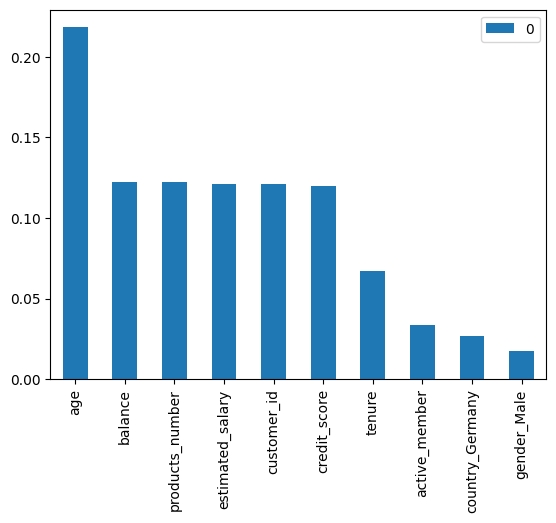

In [21]:
feature_importance.head(10).plot(kind='bar')

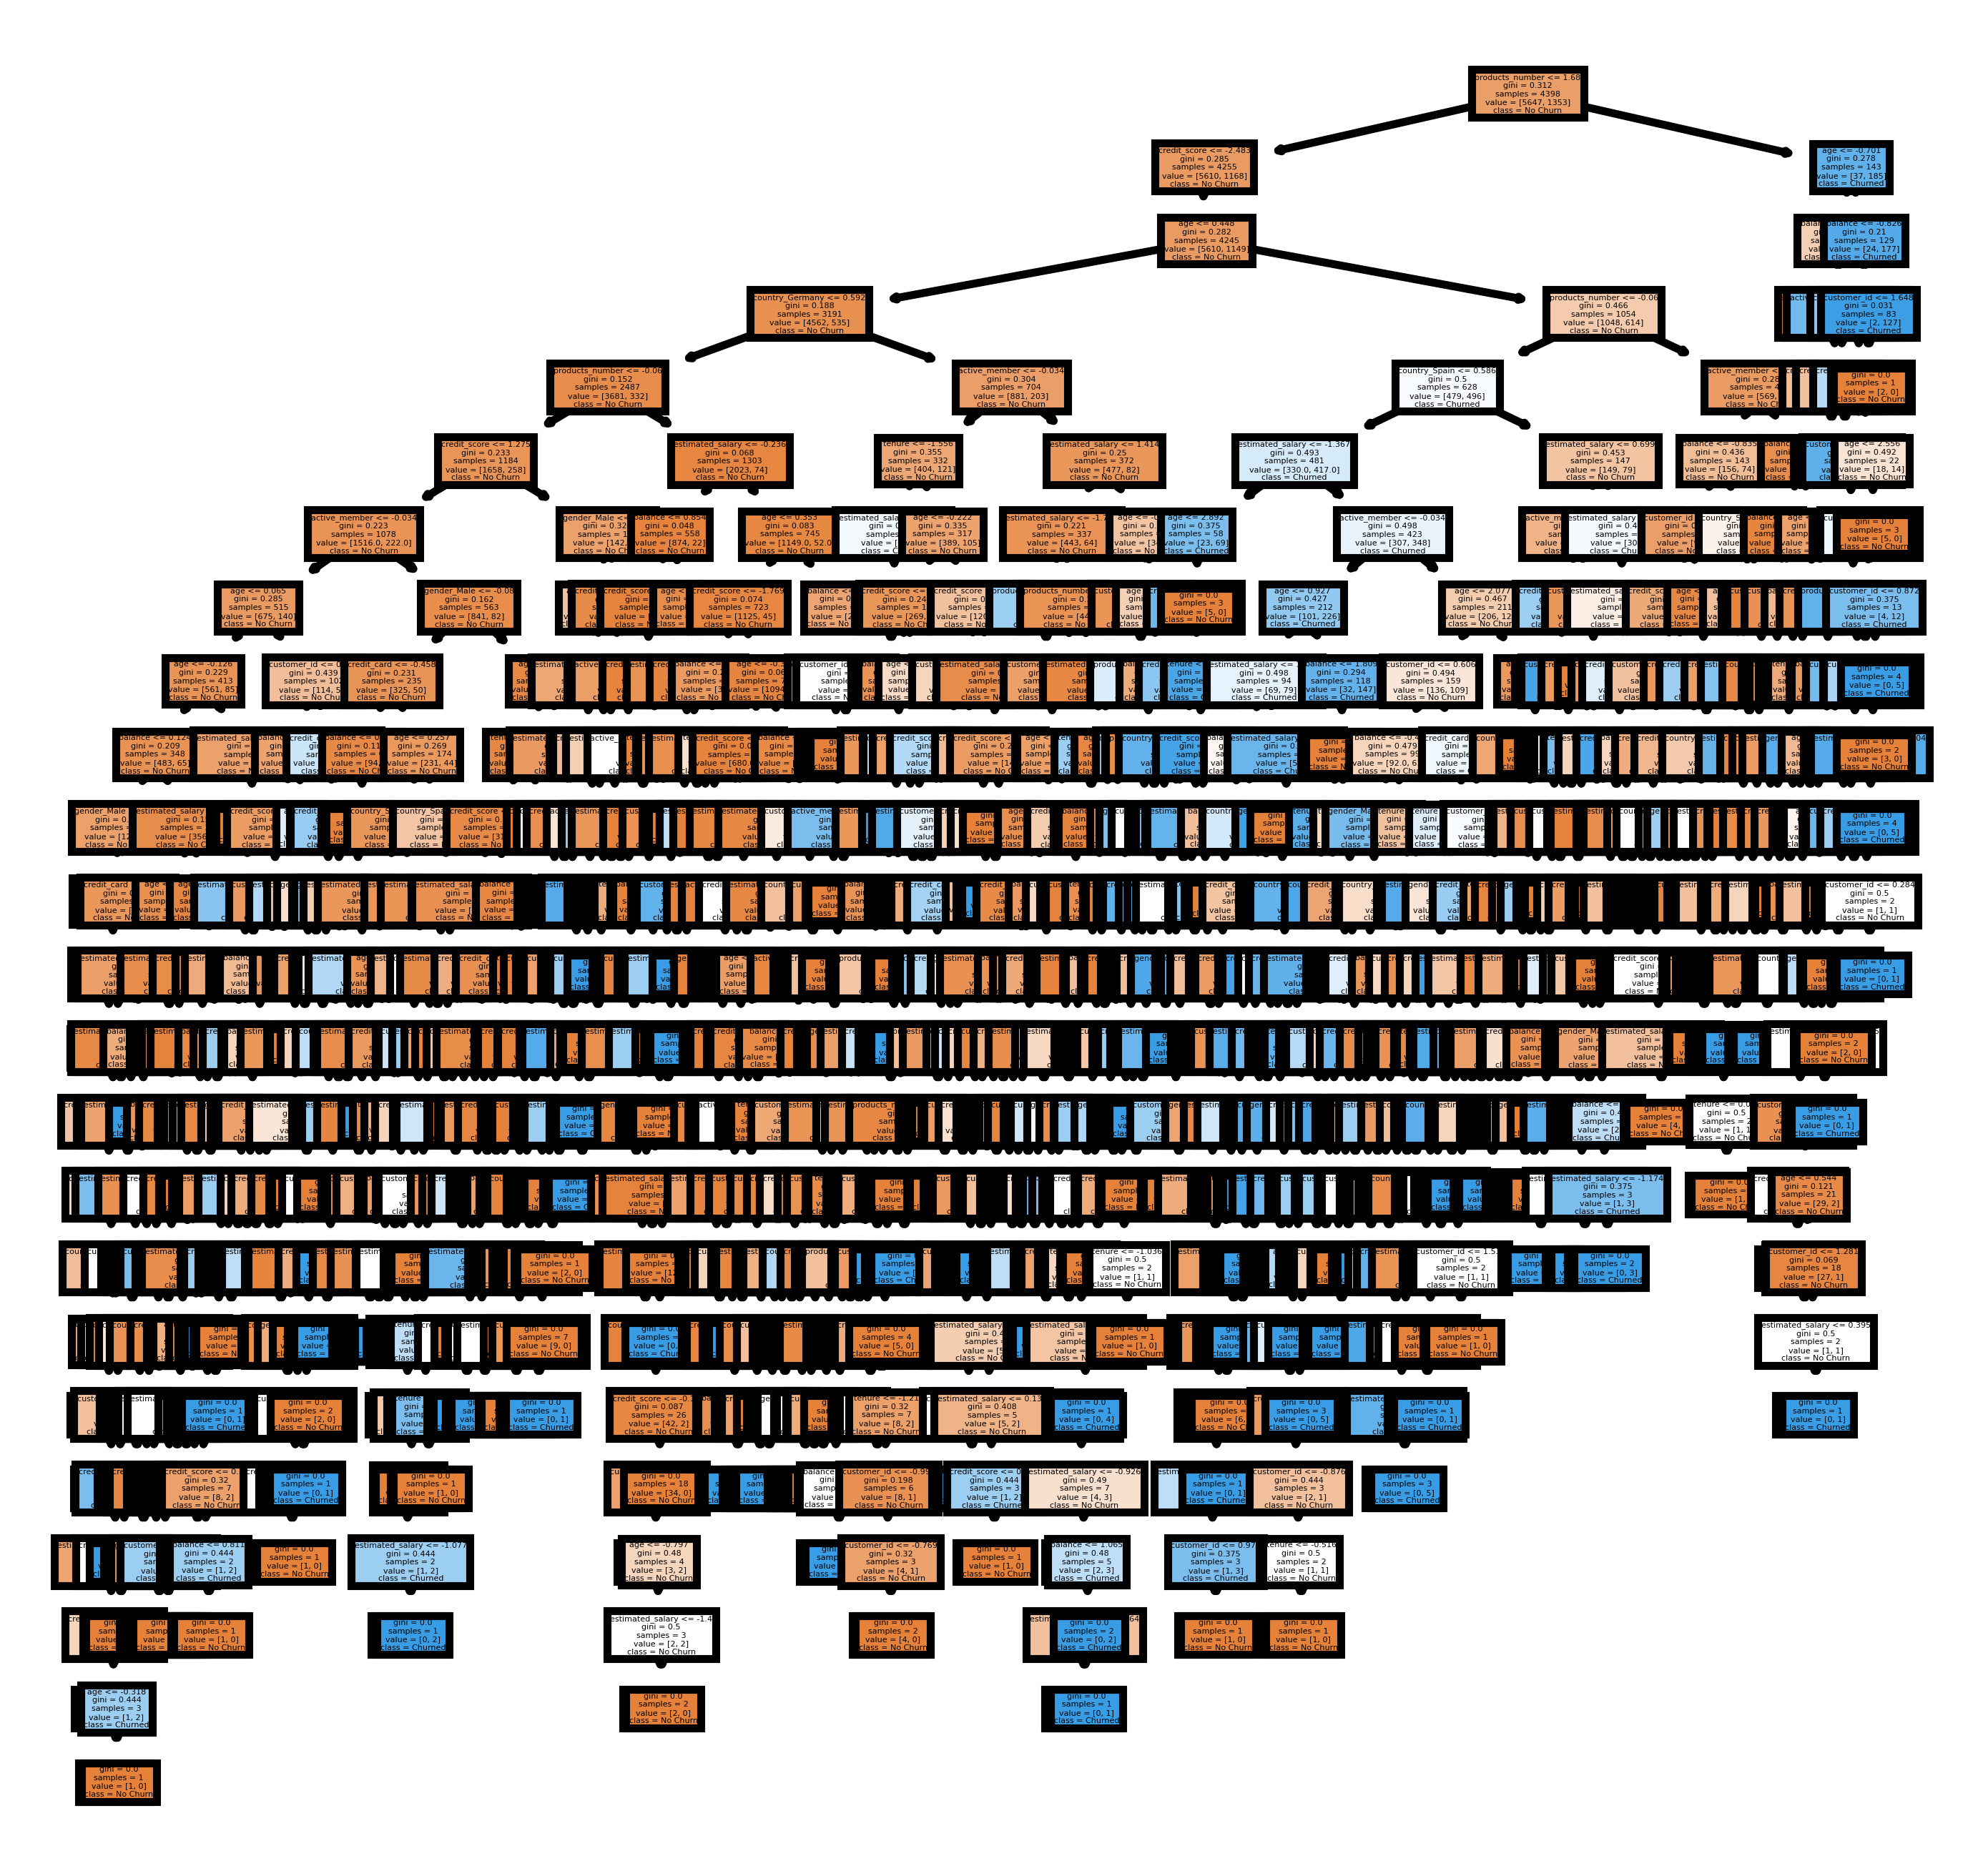

In [22]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc_100.estimators_[0],           
               feature_names = feature_names, 
               class_names={0:'No Churn', 1:'Churned'},
               filled = True);

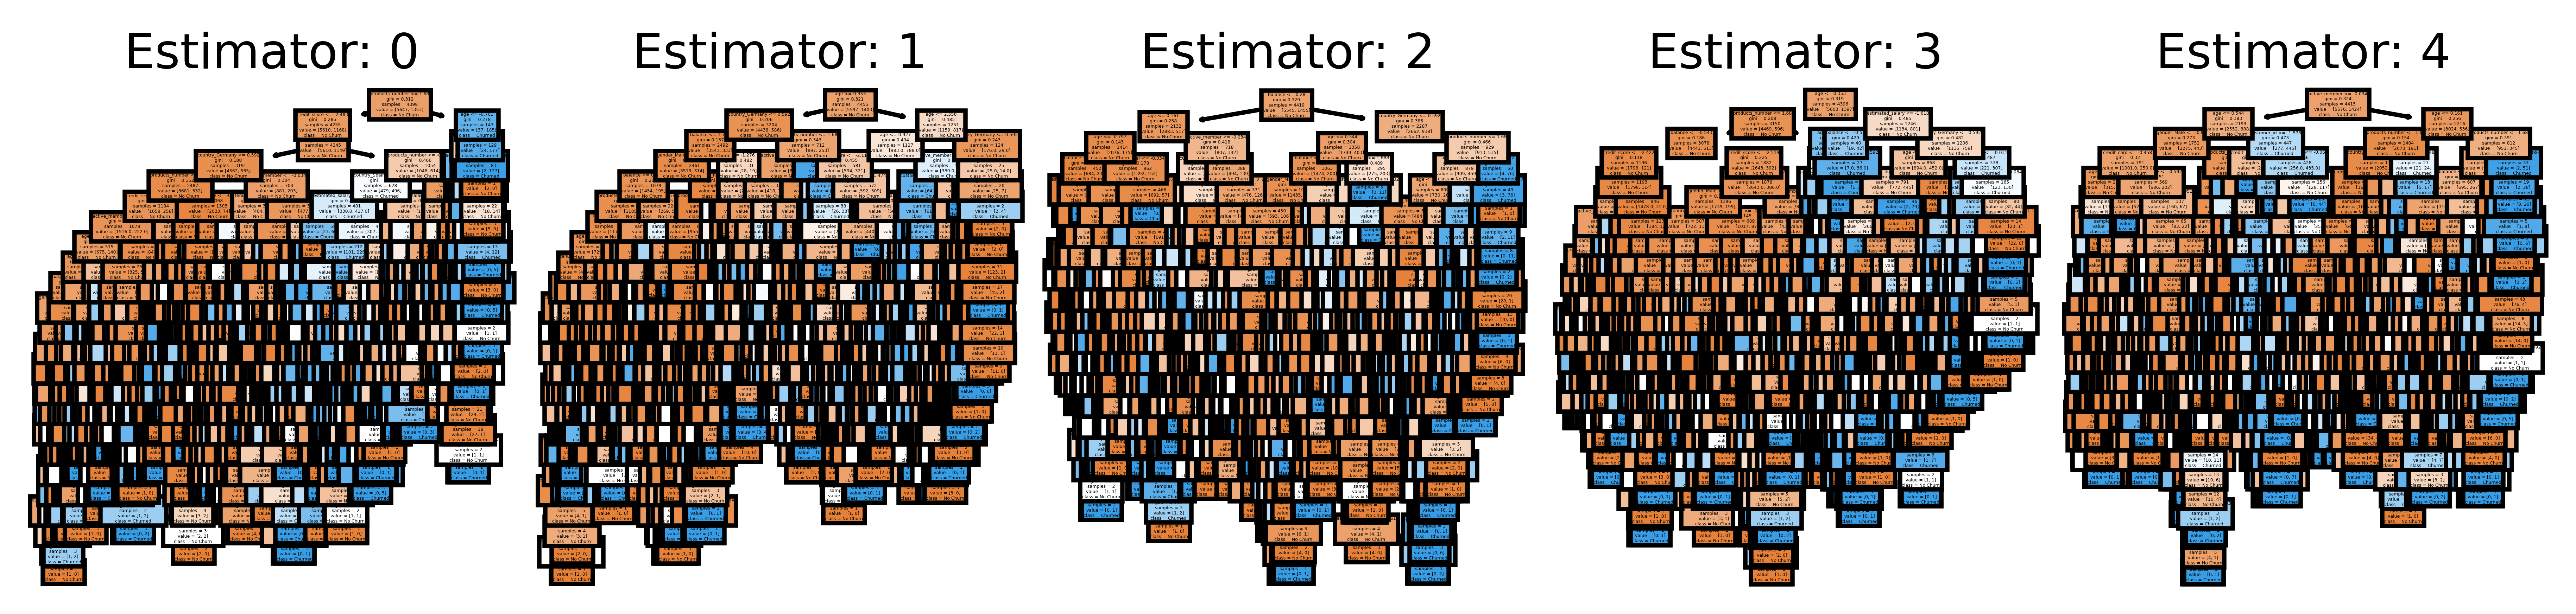

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rfc_100.estimators_[index],           
               feature_names = feature_names, 
               class_names={0:'No Churn', 1:'Churned'},
               filled = True,
              ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)